In [3]:
import numpy as np
import pandas as pd

In [5]:
# Importing the data itself
data_set  = pd.read_csv('D:/ExcelR/Support Vector Machines/SalaryData_Test(1).csv')

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
occupation_set = set(data_set['occupation'])
print(occupation_set)

{' Machine-op-inspct', ' Prof-specialty', ' Priv-house-serv', ' Sales', ' Craft-repair', ' Transport-moving', ' Adm-clerical', ' Farming-fishing', ' Protective-serv', ' Armed-Forces', ' Tech-support', ' Other-service', ' Exec-managerial', ' Handlers-cleaners'}


In [14]:
# Now we classify them as numers instead of their names.
data_set['occupation'] = data_set['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)
data_set.head()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
# Again, let's see how many unique categories we have in this property
income_set = set(data_set['Salary'])
print(income_set)

{' >50K', ' <=50K'}


In [19]:
# As expected. Just transforming now.
data_set['Salary'] = data_set['Salary'].map({'<=50K': 0, '>50K': 1}).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
# Just print it to see if nothing gone wrong
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [26]:
import matplotlib as plt
%matplotlib inline

data_set.groupby('education').Salary.mean().plot(kind='bar')

DataError: No numeric types to aggregate

In [37]:
data_set.groupby('occupation').Salary.mean().plot(kind='bar')

DataError: No numeric types to aggregate

In [29]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = data_set[['educationno', 'occupation']]

# Taking the labels (Income)
Y = data_set['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

ValueError: could not convert string to float: ' Other-service'

In [35]:
# Transforming the Sex into 0 and 1
data_set['sex'] = data_set['sex'].map({'Male': 0, 'Female': 1}).astype(str)

In [38]:
# How many unique races we got here?
race_set = set(data_set['race'])
print(race_set)
ata_set['race'] = data_set['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(str)
# What about maritial status?
mstatus_set = set(data_set['maritalstatus'])
print(mstatus_set)

{' White', ' Black', ' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo'}


NameError: name 'ata_set' is not defined

In [41]:
data_set['maritalstatus'] = data_set['maritalstatus'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(str)

In [43]:
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,nan,Machine-op-inspct,Own-child,Black,nan,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,nan,Farming-fishing,Husband,White,nan,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,nan,Protective-serv,Husband,White,nan,0,0,40,United-States,>50K
3,44,Private,Some-college,10,nan,Machine-op-inspct,Husband,Black,nan,7688,0,40,United-States,>50K
4,34,Private,10th,6,nan,Other-service,Not-in-family,White,nan,0,0,30,United-States,<=50K


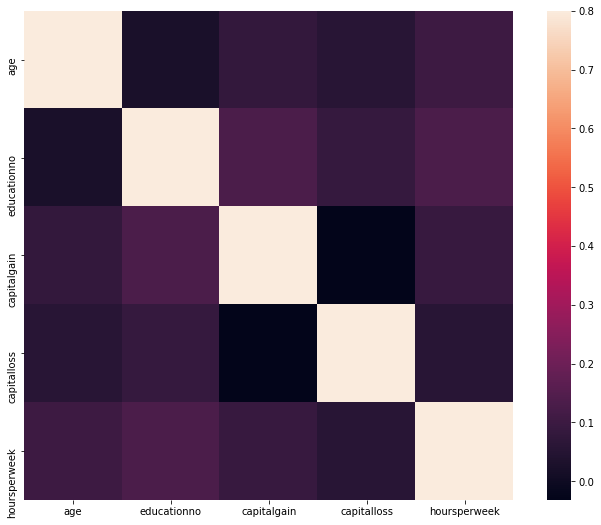

In [45]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [48]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

KeyError: 'Salary'

In [50]:
# Taking only the features that is important for now
X = data_set[['educationno', 'age']]

# Taking the labels (Income)
Y = data_set['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [52]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7785524568393094


In [54]:
# Taking only the features that is important for now
X = data_set[['educationno', 'age', 'hoursperweek', 'capitalgain']]

# Taking the labels (Income)
Y = data_set['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7848605577689243


In [59]:
data_set.groupby('race').Salary.mean().plot(kind='bar')

DataError: No numeric types to aggregate

In [61]:
data_set.groupby('sex').Salary.mean().plot(kind='bar')

DataError: No numeric types to aggregate

In [63]:
# Mean below 20 years old
data_set.groupby('age').Salary.mean().plot(kind='bar')

DataError: No numeric types to aggregate